# Analysis 1
   * What kind of movies are liked by the audience, critics and producers and whether or not there is an overlap.The        below performed analysis is used to derive the conclusion.
   * IMBD top 250
   * Top 250 highest grossing movies
   * Top 250 movies with the highest budget
   

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


In [23]:
df = pd.read_csv('../data/movie_metadata.csv')
df = df[df['num_voted_users'] > 100][['plot_keywords', 'gross', 'budget','duration','imdb_score', 'movie_title']]
# Split the plot_keyword string based on '|' and add an row for each string that is returned
tags = df['plot_keywords'].copy().str.split('|').apply(pd.Series, 1).stack()
tags.index = tags.index.droplevel(-1)
tags.index
tags.name = 'tags'
df = df.join(tags)



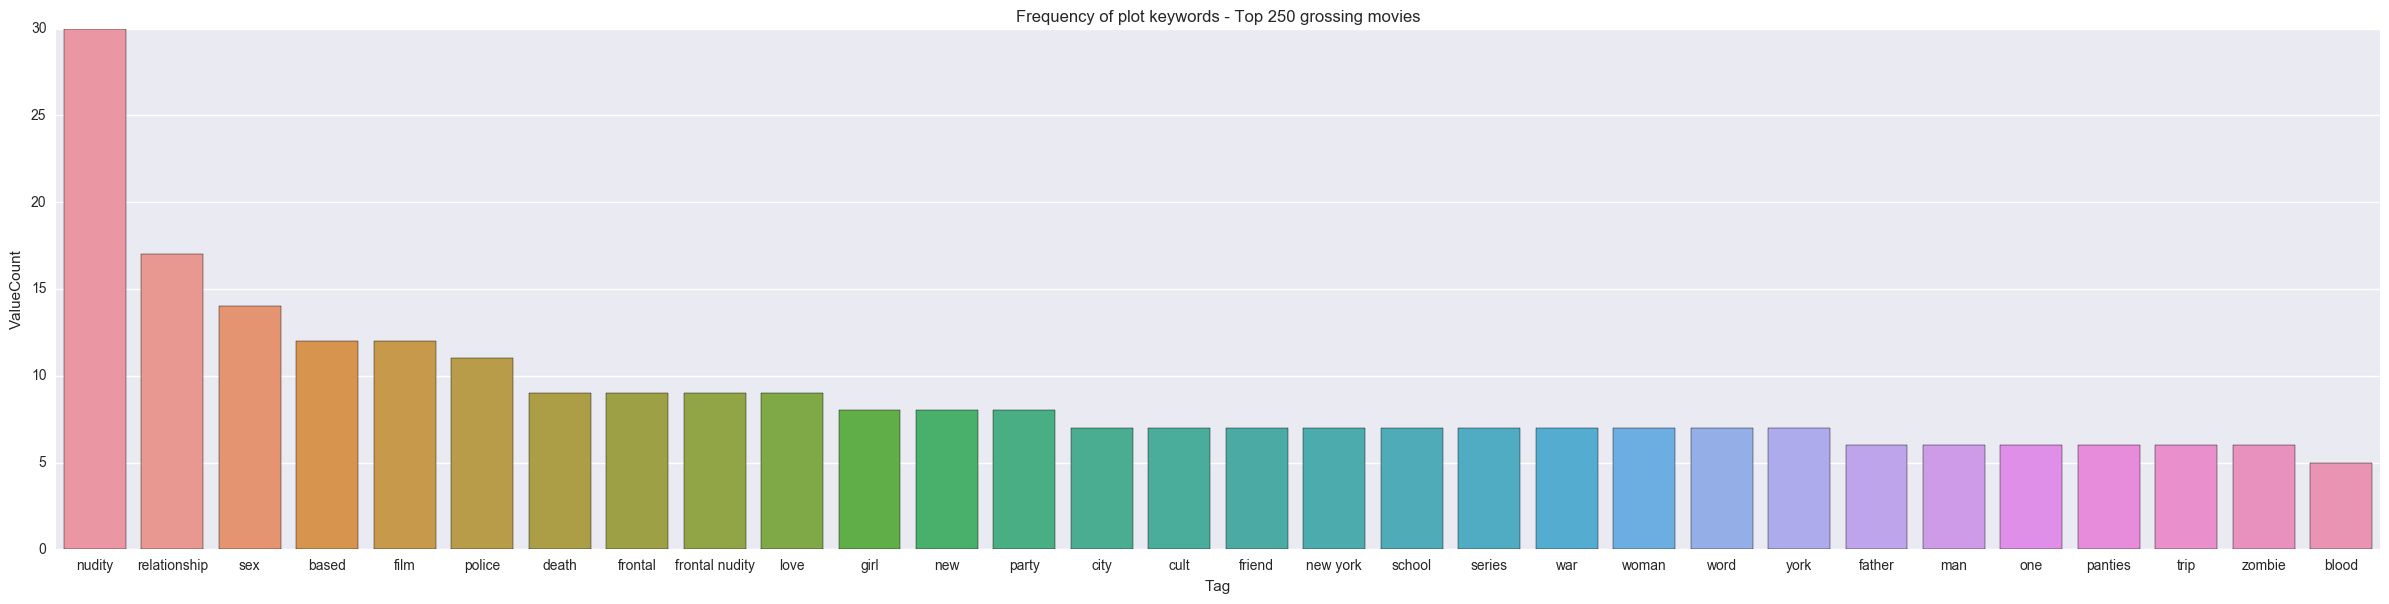

In [24]:
Top250 = df[['movie_title','gross']].drop_duplicates().sort_values('gross').tail(250)
Top250Grossing = Top250.join(df[['tags']])
X_train_counts = count_vect.fit_transform(Top250Grossing.tags.dropna())
MaxFeatureValues = X_train_counts.todense().sum(axis = 0).tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(MaxFeatureValues)), MaxFeatureValues) if pair[1] > 0]
TopTags = sorted(phrase_scores, key=lambda t: t[1] * -1)[:30]
ind = [x[0] for x in TopTags]
featurelist = count_vect.get_feature_names()
topValues250Grossing = [x[1] for x in TopTags]
TopTagsNames250Grossing = [featurelist[j] for j in ind]
ay = sns.factorplot(x="Tag", y="ValueCount", data = pd.DataFrame({'Tag':TopTagsNames250Grossing,
                                                                  'ValueCount':topValues250Grossing}),kind="bar",
                    size=6, aspect=4)
plt.title('Frequency of plot keywords - Top 250 grossing movies')

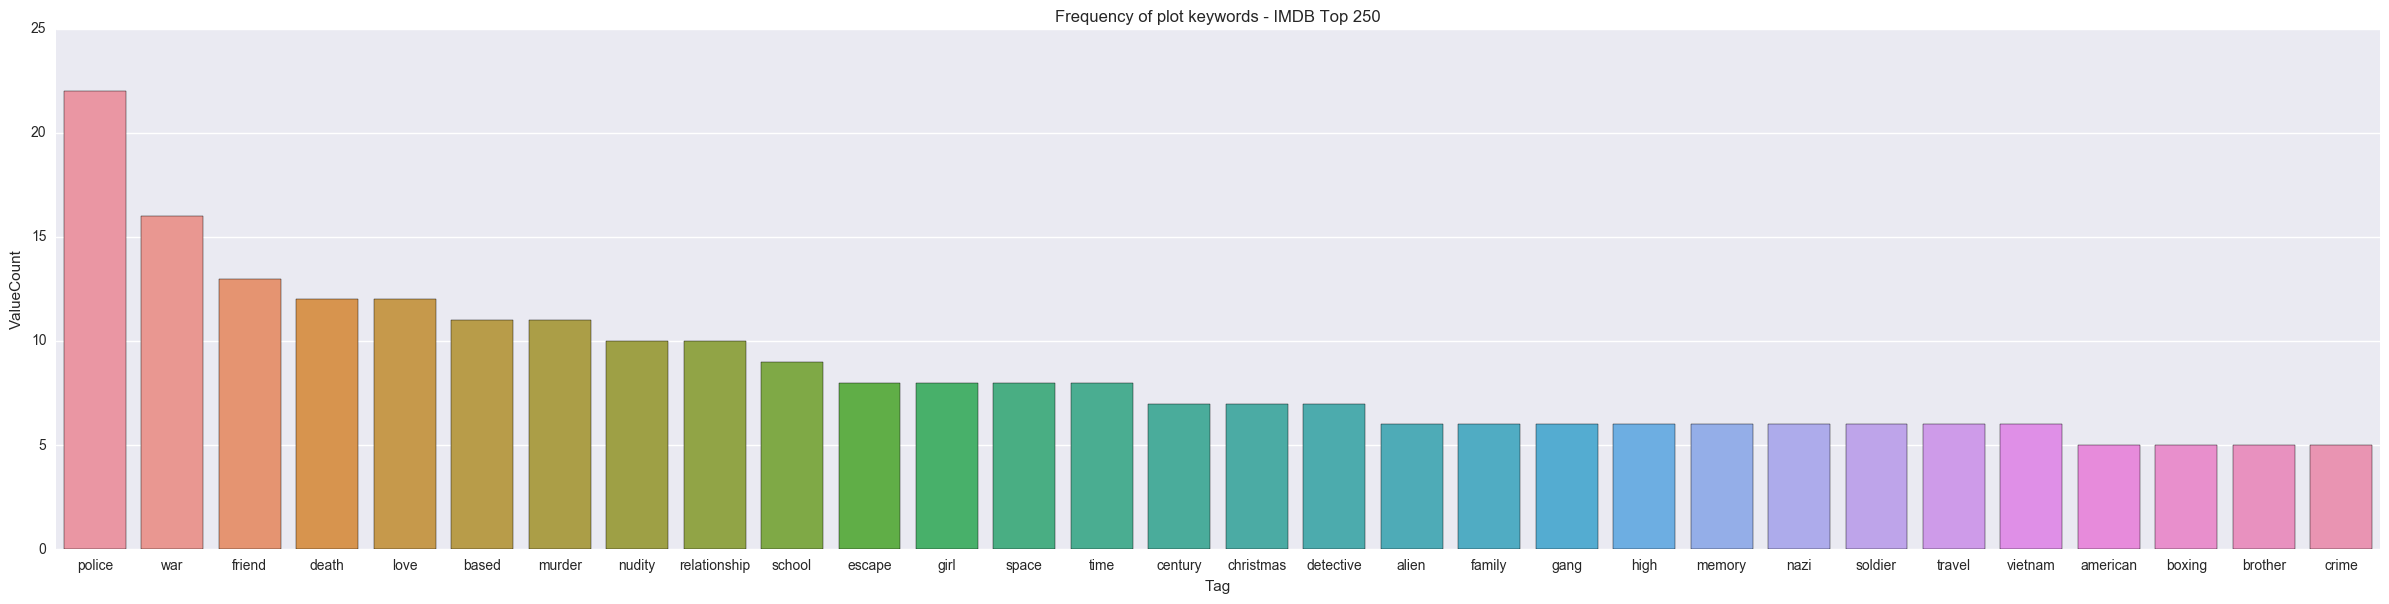

In [25]:
Top250 = df[['movie_title','imdb_score']].drop_duplicates().sort_values('imdb_score').tail(250)
Top250IMDBScore = Top250.join(df[['tags']])
X_train_counts = count_vect.fit_transform(Top250IMDBScore.tags.dropna())
MaxFeatureValues = X_train_counts.todense().sum(axis = 0).tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(MaxFeatureValues)), MaxFeatureValues) if pair[1] > 0]
TopTags = sorted(phrase_scores, key=lambda t: t[1] * -1)[:30]
ind = [x[0] for x in TopTags]
featurelist = count_vect.get_feature_names()
topValuesIMDB250 = [x[1] for x in TopTags]
TopTagsNamesIMDB250 = [featurelist[j] for j in ind]
ay = sns.factorplot(x="Tag", y="ValueCount", data = pd.DataFrame({'Tag':TopTagsNamesIMDB250,
                                                                  'ValueCount':topValuesIMDB250}),kind="bar",
                    size=6, aspect=4)
plt.title('Frequency of plot keywords - IMDB Top 250')

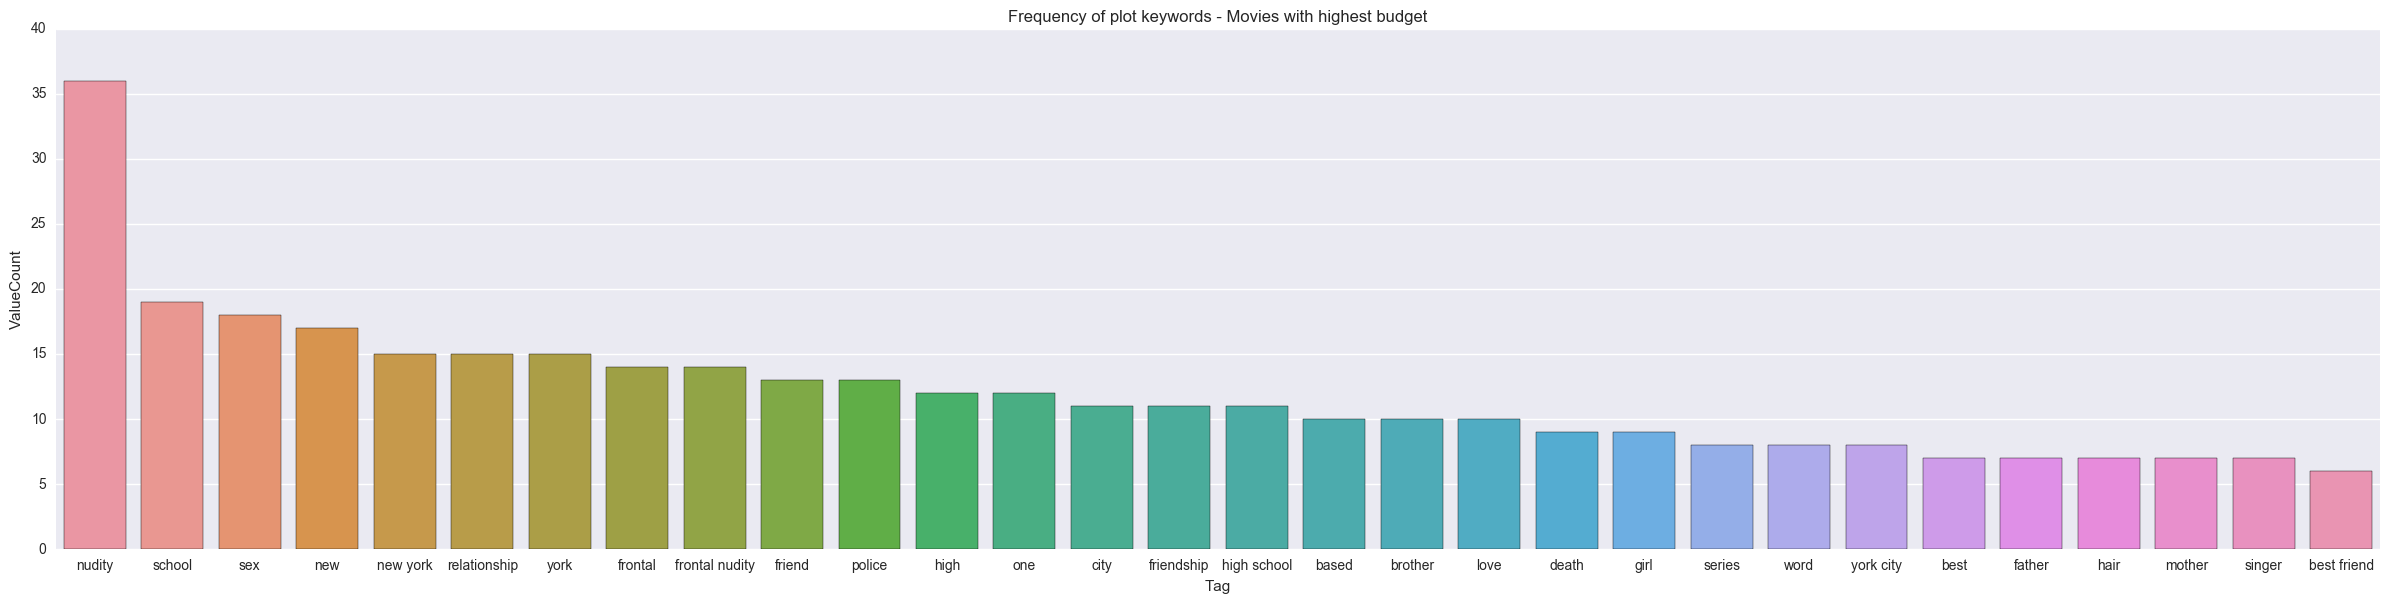

In [26]:
Top250 = df[['movie_title','budget']].drop_duplicates().sort_values('budget').tail(250)
Top250Budget = Top250.join(df[['tags']])
X_train_counts = count_vect.fit_transform(Top250Budget.tags.dropna())
MaxFeatureValues = X_train_counts.todense().sum(axis = 0).tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(MaxFeatureValues)), MaxFeatureValues) if pair[1] > 0]
TopTags = sorted(phrase_scores, key=lambda t: t[1] * -1)[:30]
ind = [x[0] for x in TopTags]
featurelist = count_vect.get_feature_names()
topValues250Budget = [x[1] for x in TopTags]
TopTagsNames250Budget = [featurelist[j] for j in ind]
ay = sns.factorplot(x="Tag", y="ValueCount", data = pd.DataFrame({'Tag':TopTagsNames250Budget,
                                                                  'ValueCount':topValues250Budget}),kind="bar",
                    size=6, aspect=4)
plt.title('Frequency of plot keywords - Movies with highest budget')

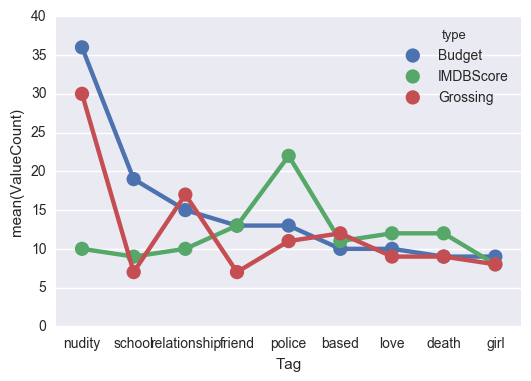

In [27]:
# AS suggested by PeterWendel here is an analysis of the word count for the common terms 
commonTags = list(set(TopTagsNames250Budget).intersection(TopTagsNames250Grossing).intersection(TopTagsNamesIMDB250))

Top250Budget = pd.DataFrame({'Tag':TopTagsNames250Budget,'ValueCount':topValues250Budget})
Top250IMDB = pd.DataFrame({'Tag':TopTagsNamesIMDB250,'ValueCount':topValuesIMDB250})
Top250Gross = pd.DataFrame({'Tag':TopTagsNames250Grossing,'ValueCount':topValues250Grossing})

Top250BudgetFiltered = Top250Budget.copy()[Top250Budget['Tag'].isin(commonTags)]
Top250BudgetFiltered['type'] = 'Budget'
Top250IMDBFiltered = Top250IMDB.copy()[Top250IMDB['Tag'].isin(commonTags)]
Top250IMDBFiltered['type'] = 'IMDBScore'
Top250GrossFiltered = Top250Gross.copy()[Top250Gross['Tag'].isin(commonTags)]
Top250GrossFiltered['type'] = 'Grossing'
Top250BudgetFiltered = Top250BudgetFiltered.append(Top250IMDBFiltered).append(Top250GrossFiltered)
sns.pointplot(x="Tag", y="ValueCount", hue="type", data=Top250BudgetFiltered)